# 3. Descriptive Analytics & Data Visualisation (done)

This class will be a bit different. You will first be given some examples of visual summarizing using Seaborn and Bokeh, to give an idea of the possibilities/structure (and some code to copy/paste). In Section 2 you're given a new dataset with some tasks/question. To point is to play around using the ideas you have already seen and try to answer some questions. There is no straightforward 100% correct solution to these answers. However, we will give you 'our' solutions at the end.

# 3.1 Seaborn - Titanic data

## 3.1.1 Explore the data

The titanic data entails 12 recorded variables. 
- PassengerID: the passengernumber
- survival: Survival(0 = No; 1 = Yes)            
- pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- ticket: Ticket Number
- fare: Passenger Fare
- cabin: Cabin
- embarked:  Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
# to make the .py script runnable
#!/usr/bin/env python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [2]:
# Load data
titanic = pd.read_csv('data/titanic.csv')

In [ ]:
titanic.info()

In [ ]:
titanic.head()

In [ ]:
titanic.describe()

## 3.1.2 Factorplot

In [ ]:
g = sns.catplot("Survived", 
                   "Age", 
                   data=titanic, 
                   kind="bar", 
                   palette="muted", 
                   legend=True,
                   height=10)

In [ ]:
g = sns.catplot("Pclass", 
                   "Survived", 
                   "Sex", 
                   data=titanic, 
                   kind="bar", 
                   palette="muted", 
                   legend=False,
                   height=10)

In [ ]:
plt.show()

## 3.1.3 Scatterplot

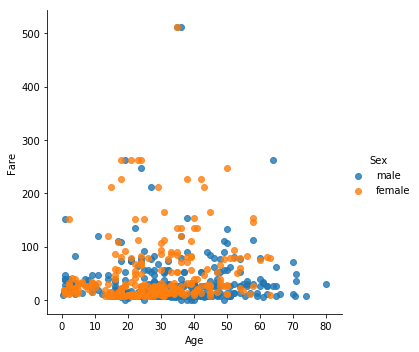

In [3]:
sns.lmplot(x='Age', 
           y='Fare', 
           data=titanic,
           fit_reg=False,
           hue='Sex')

(0, 40)

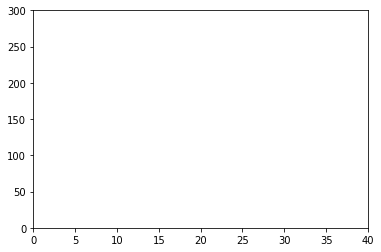

In [4]:
plt.ylim(0, 300)
plt.xlim(0, 40)

In [5]:
plt.show()

## 3.1.4 Boxplot

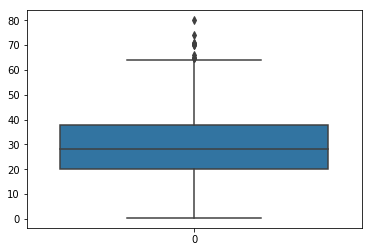

In [13]:
sns.boxplot(data=titanic['Age'])

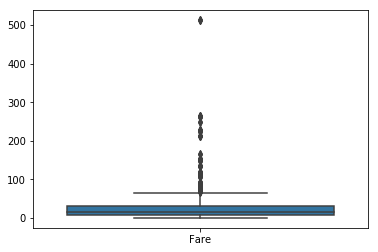

In [12]:
sns.boxplot(data=titanic.drop(['Age','PassengerId','Survived','Pclass','SibSp','Parch'],axis=1))

In [ ]:
plt.show()

## 3.1.5 Violinplot

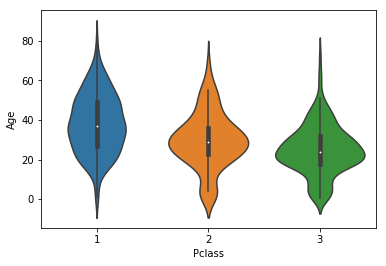

In [14]:
sns.violinplot(x='Pclass', y='Age', data=titanic)

In [ ]:
plt.show()

## 3.1.6 Swarmplot

** WARNING: THIS CAN TAKE A COUPLE OF MINUTES... **

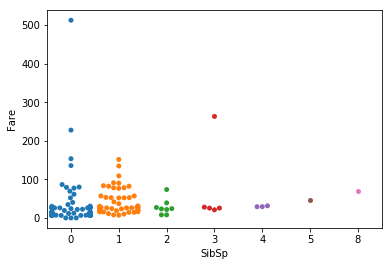

In [15]:
# I take a sample of the data here to speed things up, you can try it on the complete dataset
sns.swarmplot(x='SibSp', y='Fare', data=titanic.sample(200))

In [ ]:
plt.show()

## 3.1.7 Superimposing charts

It can be useful to superimpose different charts in order to get a more complete view of the underlying data. 

** Untill you call the plt.show() function, the figures are superimposed by default**
This is also valid for printing the plot to file. 

Note that this might not always work by default and it may be required to worth with axes in matplotlib (https://matplotlib.org/examples/pylab_examples/axes_demo.html)

In [16]:
# I take a small sample to demonstrate things, it looks prettier on the complete dataset - try it!
titanic_sample = titanic.sample(75)

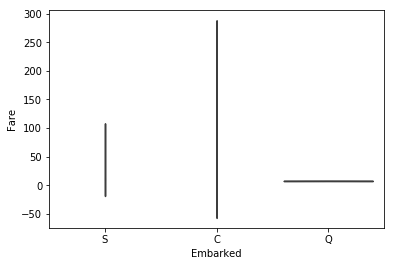

In [17]:
# Create plot
sns.violinplot(x='Embarked',
               y='Fare', 
               data=titanic_sample, 
               inner=None) # Remove the bars inside the violins)

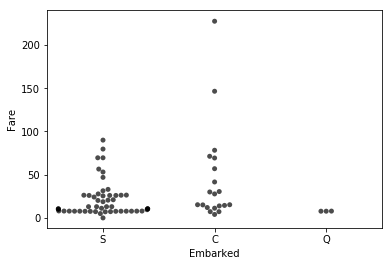

In [18]:
sns.swarmplot(x='Embarked', 
              y='Fare', 
              data=titanic_sample, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent

In [19]:
plt.show()

## 3.1.7 Adjusting parameters of charts

Because Seaborn is essentially a wrapper of the 'basic' matplotlib functionality, some of the parameters have to be adjusted directly in the latter. Some examples can be found below, but this is by no means an exhaustive list. 

### 3.1.7.1 Defining figure size

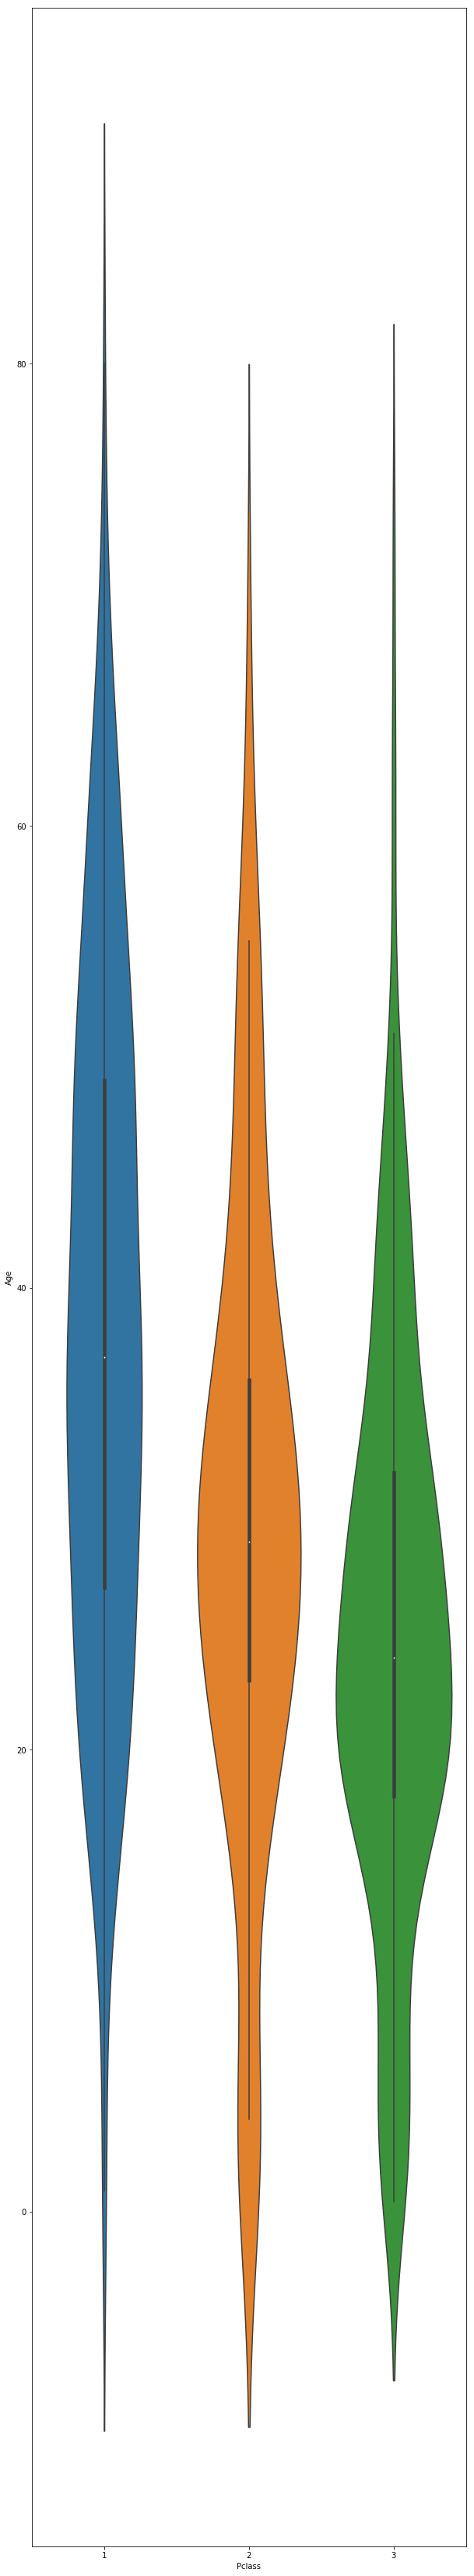

In [20]:
# Set figure size with matplotlib
plt.figure(figsize=(10,60))
sns.violinplot(x='Pclass', y='Age', data=titanic)
plt.show()

### 3.1.7.2 Setting a title

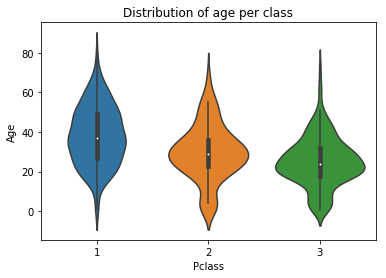

In [21]:
# Set title with matplotlib
plt.title('Distribution of age per class')
sns.violinplot(x='Pclass', y='Age', data=titanic)
plt.show()

## 3.1.8 Correlation heatmap

In [23]:
# Calculate correlations
corr = titanic.corr()
print(corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


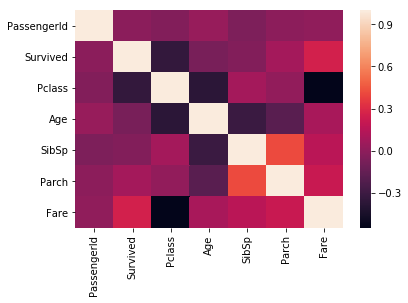

In [24]:
# Heatmap
sns.heatmap(corr)
plt.show()

## 3.1.9 Histogram

/Users/AVNH/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Users/AVNH/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

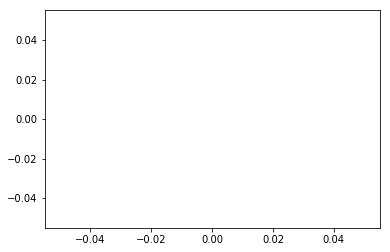

In [25]:
#sns.distplot(titanic.Age)
# Delete the first '#' to see that missing values can of course be problematic for some plots...

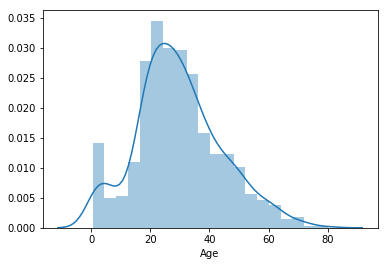

In [26]:
#Histogram
sns.distplot(titanic[titanic.Age.notnull()].Age) #take care of the NaN
plt.show()

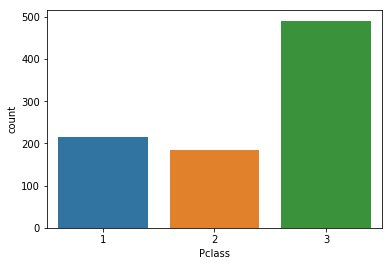

In [29]:
#countplot
sns.countplot(titanic[titanic.Pclass.notnull()].Pclass) #take care of the NaN
plt.show()

## 3.1.10 Countplot (barplot)

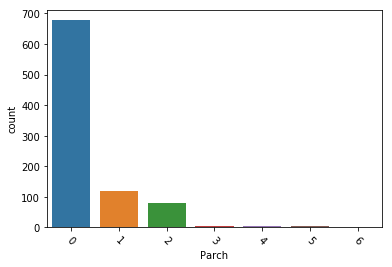

In [28]:
sns.countplot(x='Parch',data=titanic)
# Rotate x-labels
plt.xticks(rotation=-45)
plt.show()

## 3.1.11 Factor plot

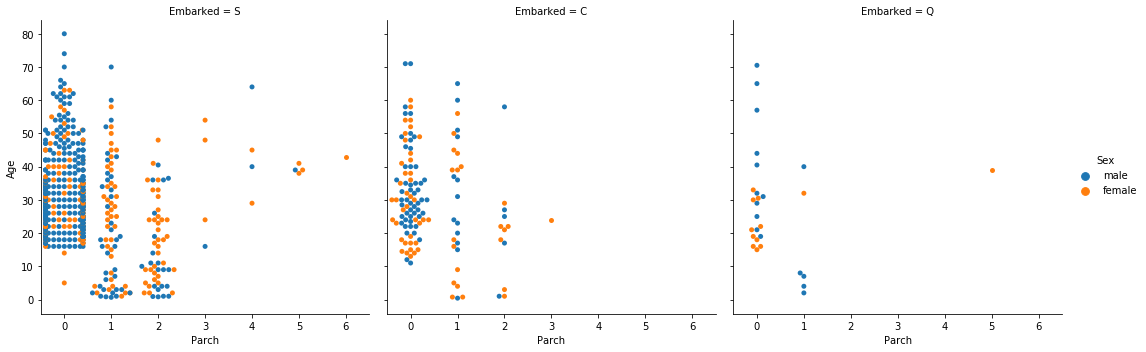

In [30]:
# Factor Plot
g=sns.catplot(x='Parch', 
                   y='Age', 
                   data=titanic,
                   hue='Sex',  # Color by stage
                   col='Embarked',  # Separate by stage
                   kind='swarm') # Swarmplot
plt.show() 

## 3.1.12 Density plot in (combintation with a scatter plot)

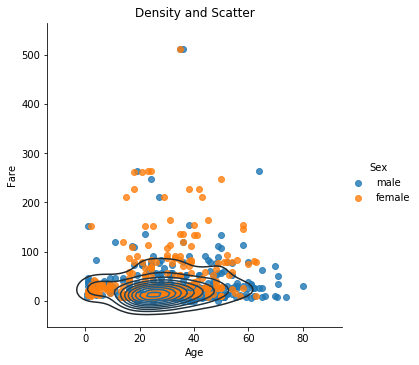

In [31]:
# Scatter plot
sns.lmplot(x='Age', y='Fare', data=titanic,fit_reg=False, hue = 'Sex')
# Density Plot
sns.kdeplot(titanic[titanic.Age.notnull()].Age, titanic[titanic.Age.notnull()].Fare)
plt.title('Density and Scatter')
plt.show()

## 3.1.13 Joint Distribution Plot

This is a way to view two distributions and their interrelationship at the same time

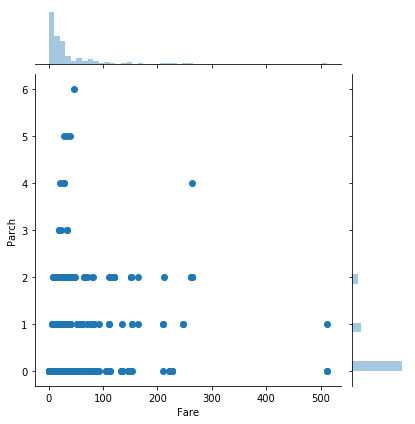

In [32]:
sns.jointplot(x='Fare', y='Parch', data=titanic)
plt.show()